<a href="https://colab.research.google.com/github/Emma-Ok/Data-science-project/blob/main/practical_sessions/Ps_1_Emmanuel_Valbuena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 1.1 Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter

# Suppress all warnings
warnings.filterwarnings('ignore')

# Para garantizar que las gráficas se muestren en Colab
%matplotlib inline

# 1.2 Configuración de estilo para visualizaciones
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_theme(style="whitegrid", palette="viridis")  # Tema personalizado
url = "https://raw.githubusercontent.com/Emma-Ok/Data-science-project/main/sources/master_df.csv"
df = pd.read_csv(url)
df = df.drop(columns=['id_player'])

In [17]:
print(df.head())

         player_name  nationality field_position            position  \
0         Harry Kane      England        Forward             STRIKER   
1    Viktor Gyökeres       Sweden        Forward                 NaN   
2    Vinícius Júnior       Brazil        Forward             UNKNOWN   
3  Tijjani Reijnders  Netherlands     Midfielder  CENTRAL_MIDFIELDER   
4  Maghnes Akliouche       France     Midfielder             UNKNOWN   

   weight(kg)  height(cm)  age  id_team  fouls_committed  fouls_suffered  ...  \
0        65.0       188.0   31    50037              2.0             6.0  ...   
1         NaN         NaN   26    50149             10.0             7.0  ...   
2         NaN         NaN   24    50051              8.0             4.0  ...   
3         NaN         NaN   26    50058              1.0             2.0  ...   
4         NaN         NaN   22    50023              5.0             8.0  ...   

   goals_conceded  saves_on_penalty  clean_sheets  punches_made  \
0            

In [18]:
print("\n📋 INFORMACIÓN GENERAL DEL DATASET:")
print("-" * 40)
print(f"• Número total de registros: {df.shape[0]}")
print(f"• Número total de variables: {df.shape[1]}")


📋 INFORMACIÓN GENERAL DEL DATASET:
----------------------------------------
• Número total de registros: 908
• Número total de variables: 50


<span style="color:Blue;"><strong>1. Introducción</strong></span>

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
En el fútbol moderno, la toma de decisiones estratégicas basada en datos se ha convertido en un factor determinante para el éxito competitivo. El presente proyecto de investigación se centra en analizar los patrones de rendimiento de los jugadores participantes en la UEFA Champions League 2025, con el objetivo de identificar los factores clave que determinan la excelencia deportiva en el máximo nivel de competición europea. Preguntas de Investigación Principales:
¿Cuáles son los patrones de rendimiento que caracterizan a los jugadores

*   ¿Cuáles son los patrones de rendimiento que caracterizan a los jugadores de élite en la Champions League 2025?
*   ¿Qué factores técnicos, físicos y tácticos determinan el éxito ofensivo y defensivo de los jugadores?
* ¿Cómo se distribuye el talento y las características de rendimiento por posiciones y equipos?
* ¿Existen correlaciones significativas entre las características físicas de los jugadores y su rendimiento en el campo?
* ¿Cuál es el perfil de rendimiento específico del Real Madrid en comparación con el resto de equipos participantes?.

</div>
<br>
<div style="background-color:#E8F5E9; padding:10px; border-radius:8px;">
<b> 2. Contexto:</b>  ¿por qué es relevante este problema?
</div>

La UEFA Champions League representa la máxima expresión del fútbol de clubes a nivel mundial, reuniendo a los mejores equipos y jugadores del continente europeo. En la temporada 2025, esta competición continúa siendo el laboratorio más exigente para evaluar el rendimiento deportivo de élite, donde cada estadística puede marcar la diferencia entre la gloria y la eliminación.

<div style="background-color:#FFF9C4; padding:10px; border-radius:8px;">
<b> 3. Relación entre el problema y la base de datos seleccionada. </b>  
</div>

  El dataset seleccionado para este análisis proviene de fuentes oficiales de la UEFA y scraping del sitio web oficial de la Champions League, lo que garantiza la autenticidad y precisión de los datos. Con 908 registros de jugadores y 51 variables que abarcan múltiples dimensiones del rendimiento, esta base de datos representa una fuente invaluable para el análisis propuesto.

In [19]:
# ==========================================
# IDENTIFICACIÓN Y CLASIFICACIÓN DE VARIABLES
# ==========================================

print("\nCLASIFICACIÓN DE VARIABLES:")
print("-" * 35)

# Clasificar variables por tipo
variables_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nVARIABLES NUMÉRICAS ({len(variables_numericas)}):")
for i, var in enumerate(variables_numericas, 1):
    print(f"  {i:2d}. {var}")

print(f"\nVARIABLES CATEGÓRICAS ({len(variables_categoricas)}):")
for i, var in enumerate(variables_categoricas, 1):
    print(f"  {i}. {var}")

# Análisis de valores faltantes
print("\nANÁLISIS DE VALORES FALTANTES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

print(missing_df[missing_df['Valores_Faltantes'] > 0].head(10))


CLASIFICACIÓN DE VARIABLES:
-----------------------------------

VARIABLES NUMÉRICAS (45):
   1. weight(kg)
   2. height(cm)
   3. age
   4. id_team
   5. fouls_committed
   6. fouls_suffered
   7. yellow_cards
   8. red_cards
   9. total_attempts
  10. attempts_on_target
  11. attempts_off_target
  12. blocked
  13. passing_accuracy(%)
  14. passes_attempted
  15. passes_completed
  16. crossing_accuracy(%)
  17. crosses_attempted
  18. crosses_completed
  19. free_kick_taken
  20. matches_appearance
  21. distance_covered(km/h)
  22. top_speed
  23. minutes_played
  24. assists
  25. corners_taken
  26. offsides
  27. dribbles
  28. goals
  29. inside_area
  30. outside_area
  31. right_foot
  32. left_foot
  33. head
  34. other
  35. penalties_scored
  36. saves
  37. goals_conceded
  38. saves_on_penalty
  39. clean_sheets
  40. punches_made
  41. balls_recovered
  42. tackles
  43. tackles_won
  44. tackles_lost
  45. clearance_attempted

VARIABLES CATEGÓRICAS (5):
  1. player_n

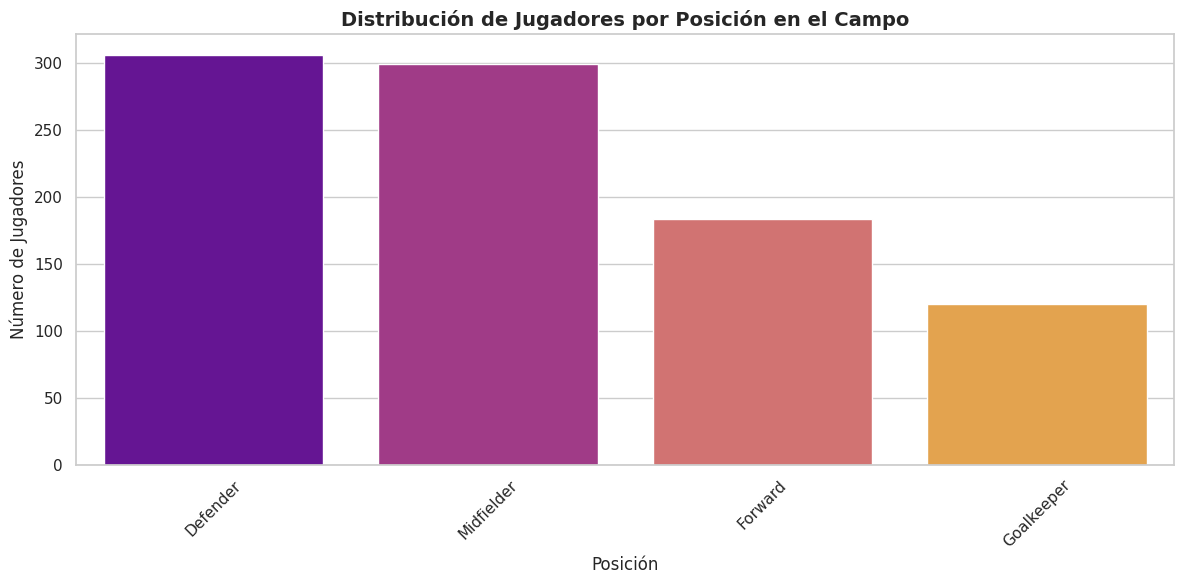

In [20]:
#Distribución por posición
plt.figure(figsize=(12, 6))
position_counts = df['field_position'].value_counts()
sns.barplot(data=pd.DataFrame({'position': position_counts.index, 'count': position_counts.values}),
            x='position', y='count', palette='plasma')
plt.title('Distribución de Jugadores por Posición en el Campo', fontsize=14, fontweight='bold')
plt.xlabel('Posición')
plt.ylabel('Número de Jugadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

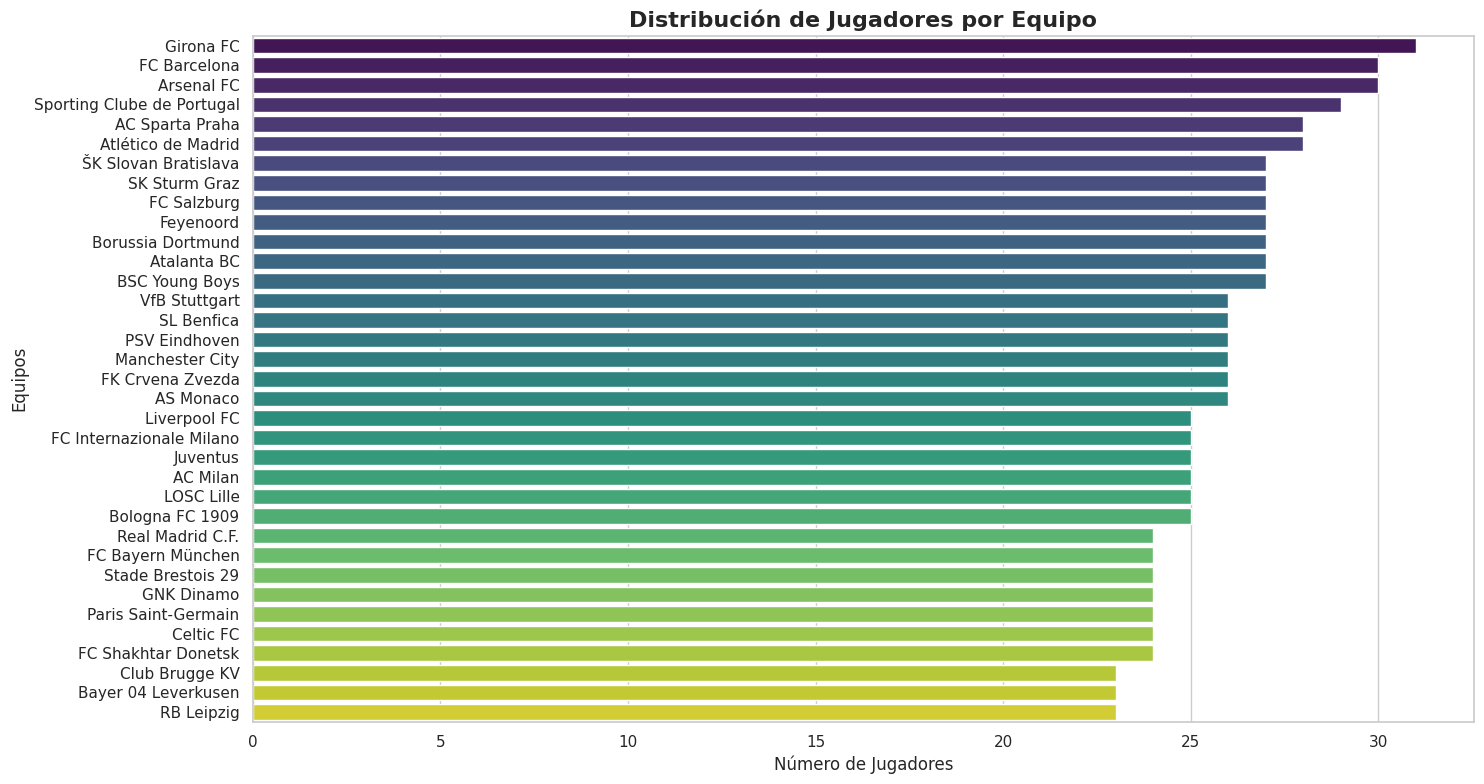

In [21]:
# Distribución de jugadores por equipo
plt.figure(figsize=(15, 8))
team_counts = df['team'].value_counts()
sns.barplot(data=pd.DataFrame({'team': team_counts.index, 'count': team_counts.values}),
            x='count', y='team', palette='viridis')
plt.title('Distribución de Jugadores por Equipo', fontsize=16, fontweight='bold')
plt.xlabel('Número de Jugadores')
plt.ylabel('Equipos')
plt.tight_layout()
plt.show()

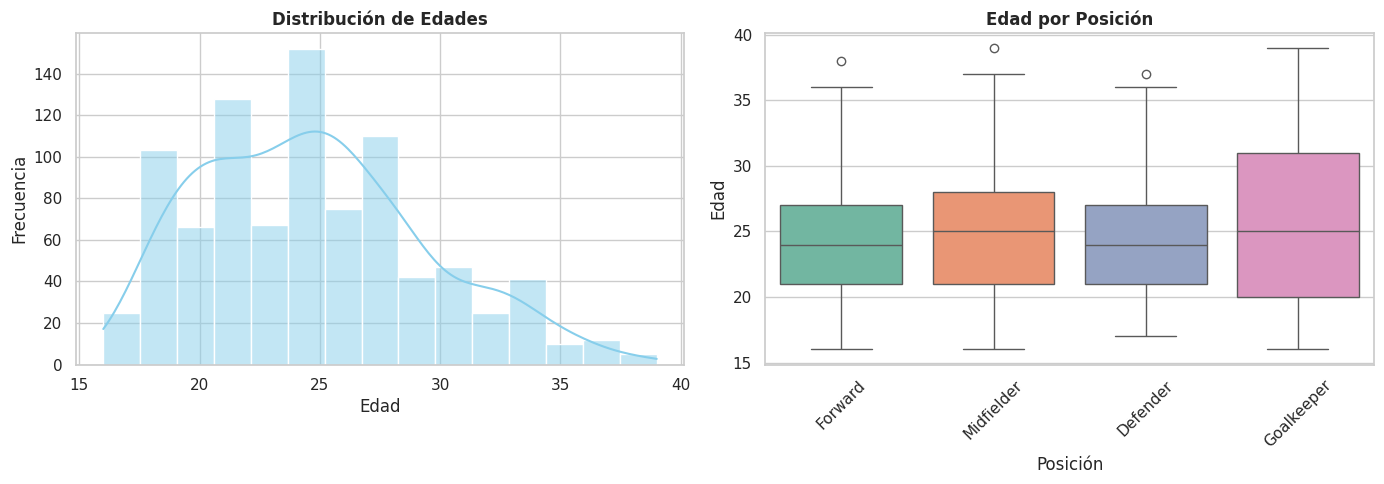

In [22]:
#Distribución de edades
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', bins=15, kde=True, color='skyblue')
plt.title('Distribución de Edades', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='field_position', y='age', palette='Set2')
plt.title('Edad por Posición', fontweight='bold')
plt.xlabel('Posición')
plt.ylabel('Edad')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

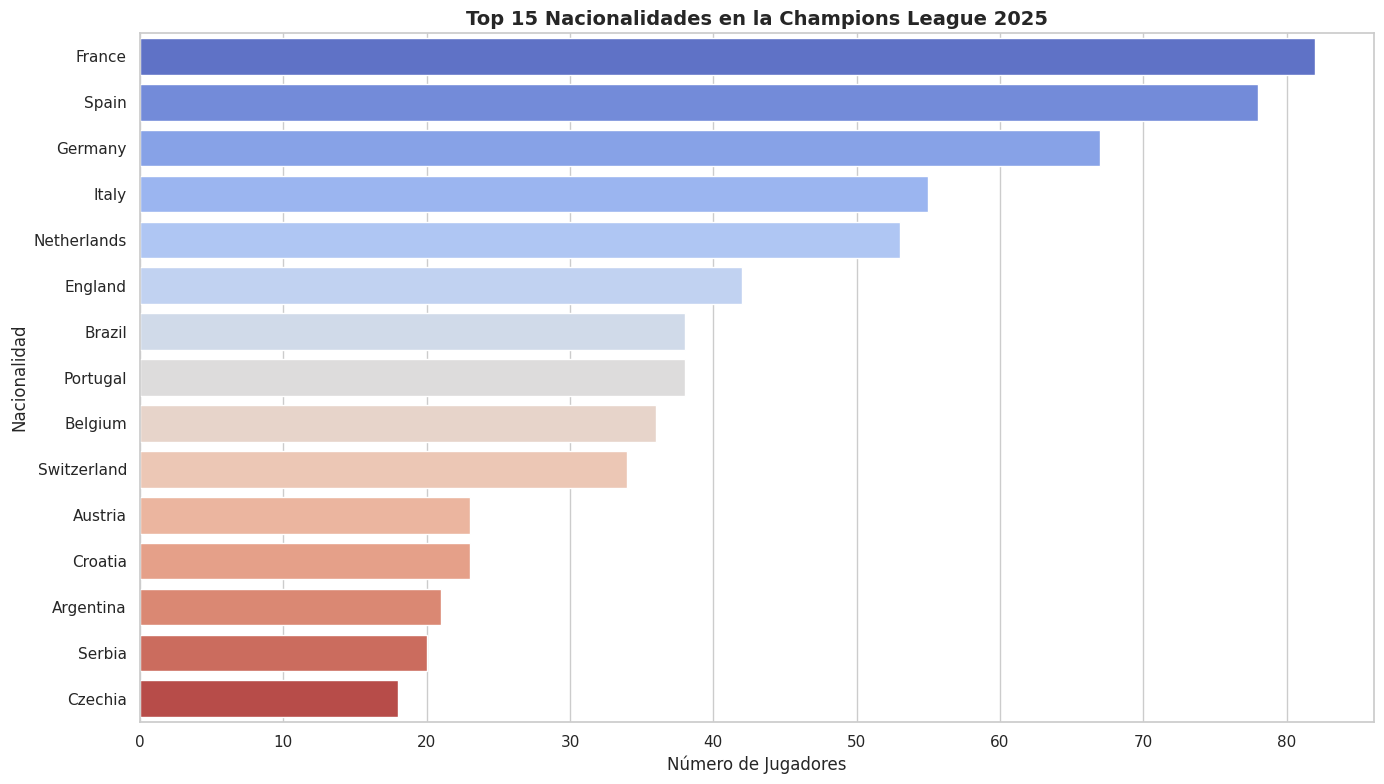

In [23]:
# 5.4 Distribución de nacionalidades (Top 15)
plt.figure(figsize=(14, 8))
top_nationalities = df['nationality'].value_counts().head(15)
sns.barplot(data=pd.DataFrame({'nationality': top_nationalities.index, 'count': top_nationalities.values}),
            y='nationality', x='count', palette='coolwarm')
plt.title('Top 15 Nacionalidades en la Champions League 2025', fontsize=14, fontweight='bold')
plt.xlabel('Número de Jugadores')
plt.ylabel('Nacionalidad')
plt.tight_layout()
plt.show()

## Enfoque hacia equipos especificos. En este caso Real madrid

In [24]:
print("\nANÁLISIS ESPECÍFICO: REAL MADRID")
print("=" * 40)

# Filtrar datos del Real Madrid
real_madrid_df = df[df['team'] == 'Real Madrid C.F.'].copy()
print(f"Número de jugadores del Real Madrid: {len(real_madrid_df)}")


ANÁLISIS ESPECÍFICO: REAL MADRID
Número de jugadores del Real Madrid: 24


In [25]:
# 6.2 Top jugadores del Real Madrid
print(f"\nTOP GOLEADORES DEL REAL MADRID:")
top_scorers_rm = real_madrid_df.nlargest(5, 'goals')[['player_name', 'goals', 'assists', 'field_position']]
print(top_scorers_rm.to_string(index=False))


TOP GOLEADORES DEL REAL MADRID:
    player_name  goals  assists field_position
Vinícius Júnior    4.0      0.0        Forward
Antonio Rüdiger    2.0      0.0       Defender
  Kylian Mbappé    1.0      1.0        Forward
  Lucas Vázquez    1.0      0.0     Midfielder
        Endrick    1.0      0.0        Forward


In [26]:
print(f"\nTOP ASISTENTES DEL REAL MADRID:")
top_assists_rm = real_madrid_df.nlargest(5, 'assists')[['player_name', 'assists', 'goals', 'field_position']]
print(top_assists_rm.to_string(index=False))



TOP ASISTENTES DEL REAL MADRID:
    player_name  assists  goals field_position
  Kylian Mbappé      1.0    1.0        Forward
    Luka Modrić      1.0    0.0     Midfielder
        Rodrygo      1.0    0.0        Forward
Vinícius Júnior      0.0    4.0        Forward
Antonio Rüdiger      0.0    2.0       Defender


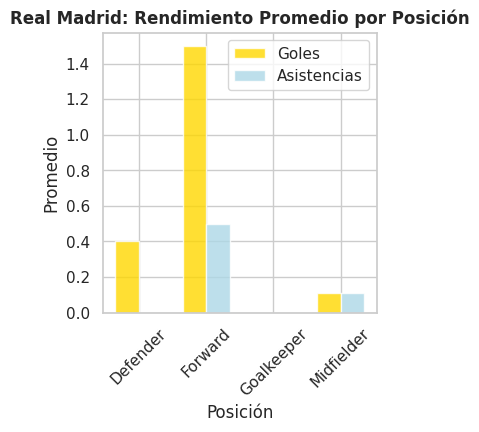

In [27]:
 # Rendimiento promedio por posición
plt.subplot(2, 3, 4)
rm_performance = real_madrid_df.groupby('field_position').agg({
    'goals': 'mean',
    'assists': 'mean'
}).reset_index()

x = np.arange(len(rm_performance))
width = 0.35
plt.bar(x - width/2, rm_performance['goals'], width, label='Goles', color='gold', alpha=0.8)
plt.bar(x + width/2, rm_performance['assists'], width, label='Asistencias', color='lightblue', alpha=0.8)
plt.xlabel('Posición')
plt.ylabel('Promedio')
plt.title('Real Madrid: Rendimiento Promedio por Posición', fontweight='bold')
plt.xticks(x, rm_performance['field_position'], rotation=45)
plt.legend()






Text(0.5, 1.0, 'Real Madrid: Nacionalidades')

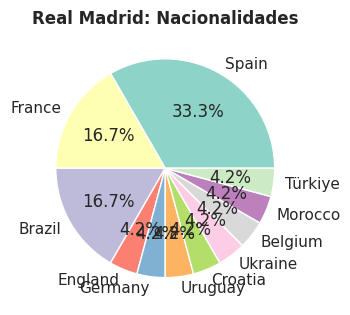

In [28]:
# Nacionalidades en Real Madrid
plt.subplot(2, 3, 5)
rm_nationalities = real_madrid_df['nationality'].value_counts()
plt.pie(rm_nationalities.values, labels=rm_nationalities.index, autopct='%1.1f%%',
        colors=sns.color_palette('Set3', len(rm_nationalities)))
plt.title('Real Madrid: Nacionalidades', fontweight='bold')

In [29]:
# Comparación Real Madrid vs Liga
print(f"\nCOMPARACIÓN: REAL MADRID vs PROMEDIO DE LA LIGA:")
print("-" * 50)

comparison_vars = ['goals', 'assists', 'total_attempts', 'passing_accuracy(%)', 'tackles']

for var in comparison_vars:
    rm_avg = real_madrid_df[var].mean()
    league_avg = df[var].mean()
    difference = ((rm_avg - league_avg) / league_avg) * 100

    status = "🔥" if difference > 0 else "❄️"
    print(f"{status} {var}: RM {rm_avg:.2f} vs Liga {league_avg:.2f} ({difference:+.1f}%)")




COMPARACIÓN: REAL MADRID vs PROMEDIO DE LA LIGA:
--------------------------------------------------
🔥 goals: RM 0.45 vs Liga 0.28 (+58.8%)
❄️ assists: RM 0.15 vs Liga 0.22 (-31.0%)
🔥 total_attempts: RM 4.05 vs Liga 2.57 (+57.6%)
🔥 passing_accuracy(%): RM 89.66 vs Liga 81.49 (+10.0%)
🔥 tackles: RM 3.55 vs Liga 2.65 (+33.7%)


In [30]:
# ==========================================
# INSIGHTS Y CONCLUSIONES INICIALES
# ==========================================

print(f"\n INSIGHTS CLAVE DEL ANÁLISIS INICIAL:")
print("=" * 45)
print(f"• Dataset con {df.shape[0]} jugadores y {df.shape[1]} variables")
print(f"• Edad promedio: {df['age'].mean():.1f} años (rango: {df['age'].min()}-{df['age'].max()})")
print(f"• Equipo con más jugadores: {df['team'].value_counts().index[0]} ({df['team'].value_counts().iloc[0]} jugadores)")
print(f"• Nacionalidad más común: {df['nationality'].value_counts().index[0]} ({df['nationality'].value_counts().iloc[0]} jugadores)")
print(f"• Máximo de goles en un jugador: {df['goals'].max():.0f}")
print(f"• Máximo de asistencias: {df['assists'].max():.0f}")
print(f"• Variables con más datos faltantes: {missing_df.iloc[0]['Variable']}")


 INSIGHTS CLAVE DEL ANÁLISIS INICIAL:
• Dataset con 908 jugadores y 50 variables
• Edad promedio: 24.7 años (rango: 16-39)
• Equipo con más jugadores: Girona FC (31 jugadores)
• Nacionalidad más común: France (82 jugadores)
• Máximo de goles en un jugador: 5
• Máximo de asistencias: 4
• Variables con más datos faltantes: weight(kg)


### Interpretaciones iniciales
¿Qué tendencias o patrones básicos se observan?


*   Los equipos en general tienen más jugadores defensas que otras posiciones.
*   El equipo



### ¿Qué limitaciones tiene la base de datos?
* No hay balance posicional uniforme (la distribución de *field_position* puede estar sesgada hacia mediocampistas y defensas).
* Las características físicas están mayormente ausentes (weight(kg) 83% faltante, height(cm) 80% faltante), lo que limita análisis físico-técnicos.
* Las métricas de rendimiento están medidas por temporada completa (no por partido), dificultando el análisis de consistencia y variabilidad intra-temporal.
* La variable *minutes_played* incluye valores extremos (desde jugadores con pocos minutos hasta titulares indiscutibles) que pueden distorsionar los promedios por minuto.

¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?
* Los minutos jugados (minutes_played) influyen positivamente en las métricas acumulativas como goles totales y asistencias totales.
* Un mayor número de intentos de tiro (total_attempts) se asocia con mayor cantidad de goles, pero con rendimientos decrecientes en la eficiencia.
* Los jugadores con más edad *age* tienden a obtener mejores métricas de precisión técnica *passing_accuracy*, compensando posible declive físico.
* Pueden existir diferencias significativas en patrones de rendimiento entre posiciones *field_position*, reflejando roles tácticos especializados.

## Conclusiones


 INSIGHTS CLAVE DEL ANÁLISIS INICIAL:
=============================================

  * Edad promedio: 24.7 años
  * Equipo con más jugadores: Girona FC (31 jugadores)
  * Nacionalidad más común: France (82 jugadores)
  * Máximo de goles en un jugador: 5
  * Máximo de asistencias: 4
  * Variables con más datos faltantes: weight(kg)

## Resumen de los principales hallazgos iniciales

La mayoría de jugadores tiene entre 23-29 años, confirmando el rango de prime deportivo.

Existe una correlación positiva moderada entre minutos jugados y métricas acumulativas de rendimiento.

Las distribuciones de nacionalidades muestran dominio de jugadores europeos (España, Inglaterra, Francia)